In [1]:
print("Hello World")

Hello World


**IMPORT MODULES**

In [2]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\ccuse\AppData\Local\Temp\ipykernel_1168\4090634496.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**LOADING THE DATASET**

In [3]:
#load csv data
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
#deleting id column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#display basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#display no of samples on each class
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**PREPROCESSING DATASET**

In [8]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**DATA ANALYSIS**

<Axes: >

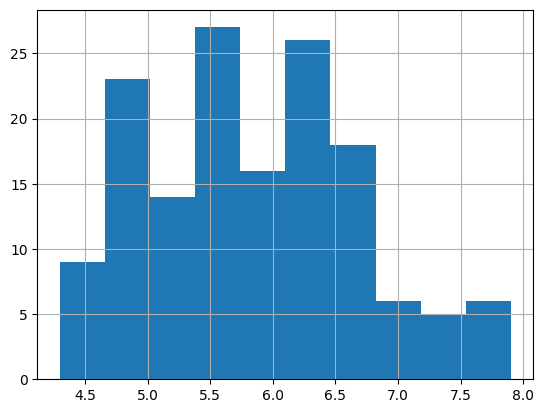

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

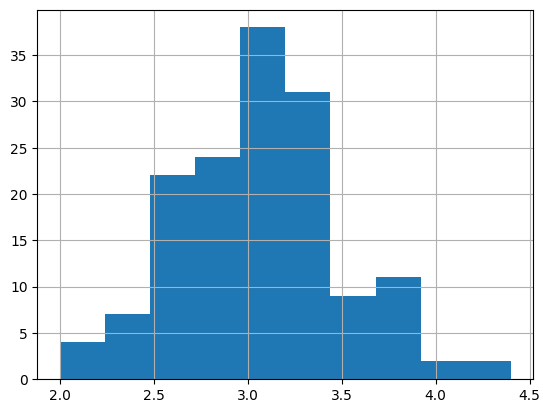

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

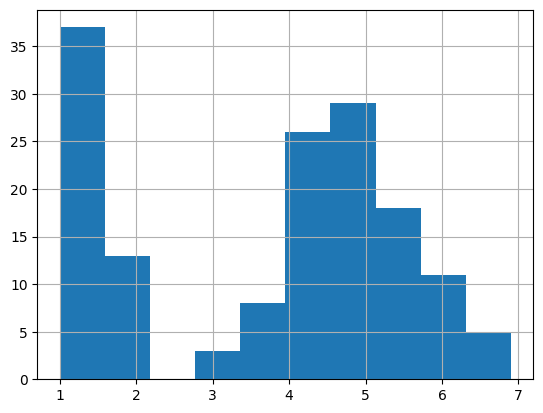

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

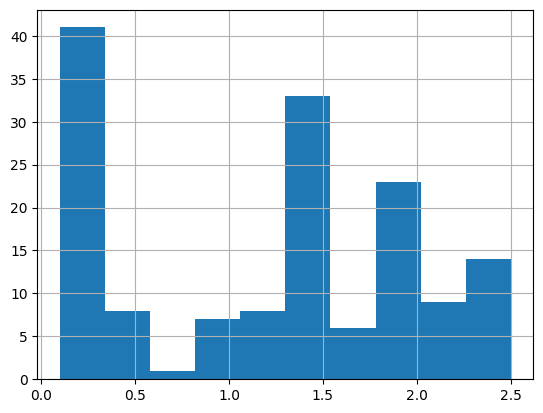

In [12]:
df['PetalWidthCm'].hist()

In [13]:
#create list of colors and class labels
colors=['red','yellow','blue']
species=['virginica','versicolor','setosa']

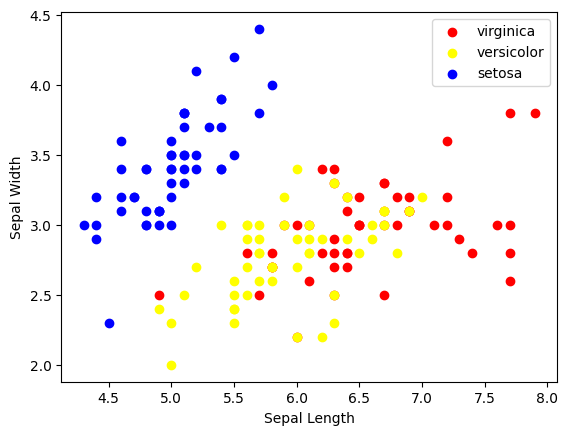

In [14]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

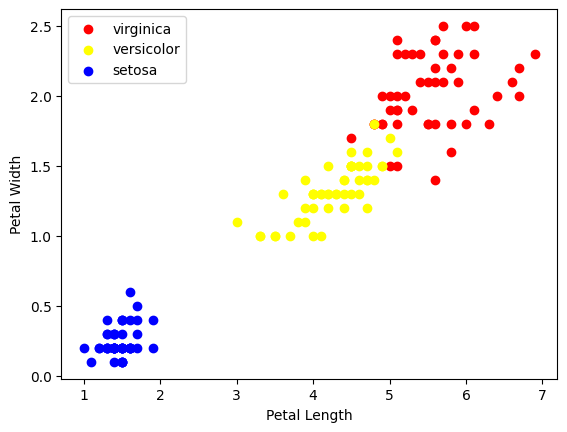

In [15]:
for i in range(3):
    #filter data on each class
    x=df[df['Species']==species[i]]
    #plot scatter plot
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

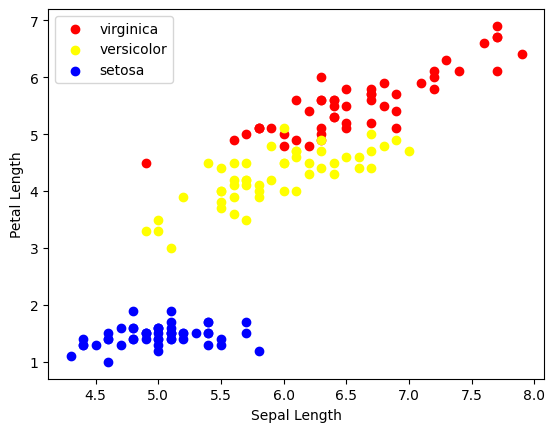

In [16]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

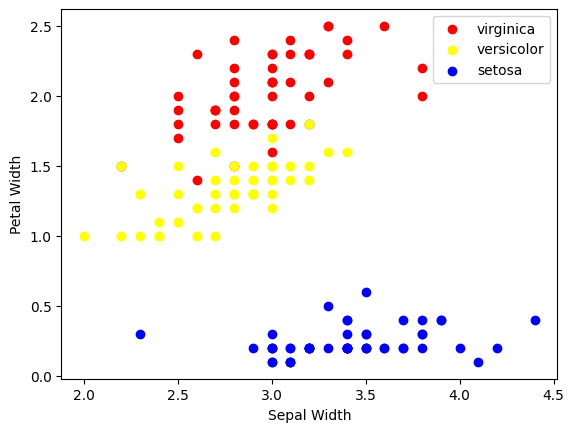

In [17]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

**CORRELATION MATRIX**

In [18]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

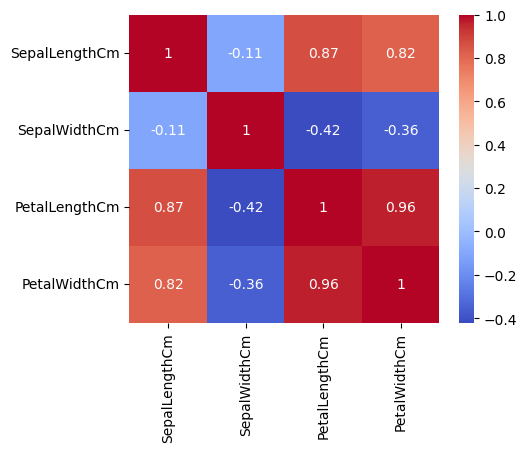

In [19]:
corr = df.corr(numeric_only=True)
#plot heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**MODEL TRAINING AND TESTING**


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X=df.drop(columns=['Species'])
#output data
Y=df['Species']
#split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [21]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  93.33333333333333


In [22]:
#model training - to improve accuracy
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [23]:
print("Accuracy: ", model.score(x_test,y_test) * 100)

Accuracy:  93.33333333333333


In [24]:
#K-Nearest Neighbours
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-Nearest Neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-Nearest Neighbors Accuracy:  93.33333333333333


In [25]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [26]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)


Accuracy:  93.33333333333333


In [27]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  91.11111111111111


In [28]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [29]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  91.11111111111111


In [30]:
#save the model:
import pickle
filename = 'Saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
import pickle

In [32]:
#save the updated model
#sav file is a data file format developed for use with storage media such as memory cards or hard drives. It stores information as text, numbers, graphics, and other data in a single data file. The . sav file format is commonly used for backing up data, transferring data between software programs, and saving datasets.
filename = 'Saved_model.sav'
try:    #doing to make sure the model is saved
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model Saved Successfully")
except Exception as e:
    print("Error saving the model: {e}")

Model Saved Successfully


In [33]:
load_model = pickle.load(open(filename, 'rb'))

In [34]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['versicolor'], dtype=object)

**LOCALLY HOSTING THE IRIS CLASSIFICATION APP USING **FLASK****

In [35]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
40,5.0,3.5,1.3,0.3
33,5.5,4.2,1.4,0.2
130,7.4,2.8,6.1,1.9


In [36]:
load_model.predict([[4,3,1,5]])   #testing

array(['virginica'], dtype=object)